<a href="https://colab.research.google.com/github/dldngud0427/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/Automotive_Security_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automotive Security
CAN Traffic Analysis

### DATA LOAD

Dataset Download

고속도로 주행 중인 차량에서 수집된 CAN 데이터셋 (약 10분)

In [ ]:
!pip install gdown
!gdown --id 1tX_BYuIaiXtGBpl_waDGcV4aevUfbCug --output Car_Dataset.csv

# https://drive.google.com/file/d/197EhIqL83N8WkWTFrkeLbc46LHZZJsXx/view?usp=sharing
# https://drive.google.com/file/d/1hseXEAs1xeqhoiR-k0cUqSg3hogCFtpQ/view?usp=sharing
# https://drive.google.com/file/d/1tX_BYuIaiXtGBpl_waDGcV4aevUfbCug/view?usp=sharing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1tX_BYuIaiXtGBpl_waDGcV4aevUfbCug
To: /content/Car_Dataset.csv
100% 51.6M/51.6M [00:00<00:00, 163MB/s]


## OBD-II 포트를 통한 자동차 내부 네트워크 (CAN Bus) 연결

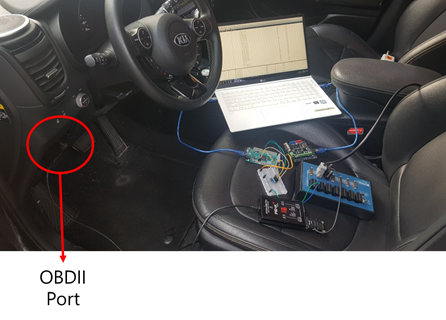


In [ ]:
import pandas as pd

df = pd.read_csv('./Car_Dataset.csv')
# Timestamp, Arbitration_ID, DLC, Data

print(df.shape)
print(df.head())

(1054015, 5)
   Timestamp Arbitration_ID  DLC                     Data   Class
0   0.795437            260    8  54 AC B0 B0 00 DB 63 55  Normal
1   0.795669            251    8  70 03 08 6F 00 8E E7 7F  Normal
2   0.795899            329    8  0F BA 7D 14 11 C7 73 21  Normal
3   0.796144            340    8  04 00 00 24 34 00 6C 10  Normal
4   0.796380            140    8  E9 86 00 68 20 00 02 F4  Normal


### CAN ID 식별

In [ ]:
# The number of distinct CAN IDs
num_ID = len(set(df['Arbitration_ID'].values))

# List of CAN IDs
list_ID = list(set(df['Arbitration_ID'].values)) # set 함수를 이용하여 중복 제거

print('The number of distinct CAN IDs:',num_ID)
print(list_ID)


The number of distinct CAN IDs: 68
['223', '568', '53E', '500', '340', '153', '490', '367', '55A', '55B', '5BE', '225', '428', '2B0', '222', '50C', '58B', '7F', '387', '47F', '59A', '130', '4F1', '140', '501', '394', '492', '368', '470', '593', '226', '166', '44', '420', '366', '220', '52A', '485', '381', '495', '43', '167', '553', '484', '251', '260', '559', '50A', '57F', '386', '520', '591', '410', '562', '453', '164', '541', '48A', '50E', '5B0', '436', '224', '507', '544', '356', '329', '421', '4A0']


### 주기 / 비주기 메시지 확인


1.   Periodic Msg 
2.   On-Event Msg 
3.   Periodic-and-On-Event Msg

In [ ]:
import matplotlib.pyplot as plt

def show_fig_time_interval(CAN_ID):
  previous_timestamp = 0
  interval_list = []
  num = 0
  for index, msg in df.iterrows():
    if msg['Arbitration_ID'] == CAN_ID:
      interval = msg['Timestamp'] - previous_timestamp
      previous_timestamp = msg['Timestamp']
      interval_list.append(interval)
      num += 1
  interval_list = interval_list[1:]

  print("The number of CAN Msgs:", num)
  plt.plot(interval_list)
  plt.ylabel("Sec")
  plt.title('Time Interval\n CAN ID: ' + CAN_ID)
  plt.rcParams["figure.figsize"] = (20,7)
  plt.show()

 
* Periodic Message

The number of CAN Msgs: 42772


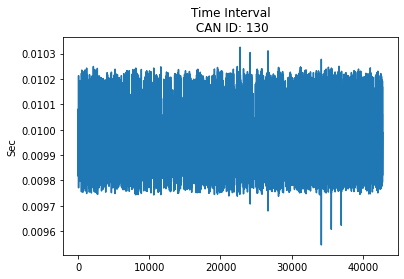

In [ ]:
CAN_ID = '130'
show_fig_time_interval(CAN_ID)

* On-Event Message

The number of CAN Msgs: 42


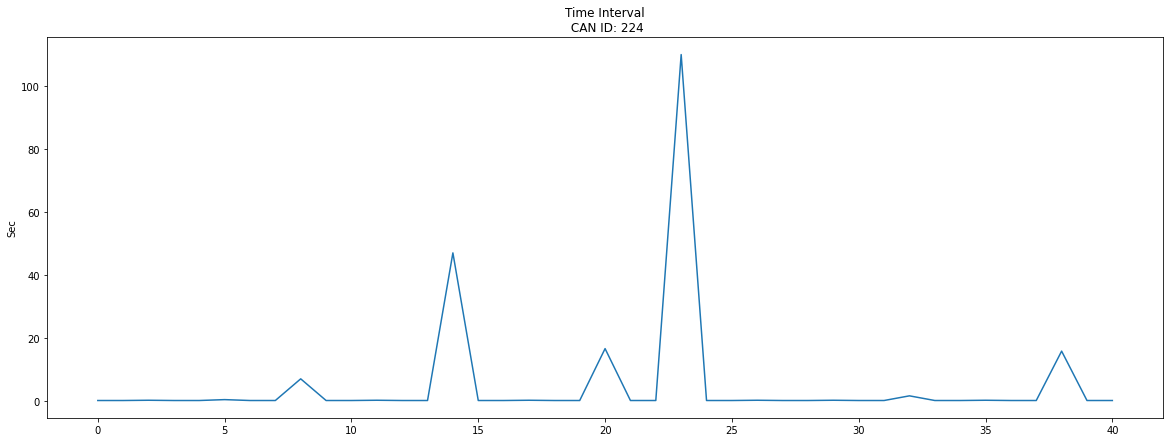

In [ ]:
CAN_ID = '224'
show_fig_time_interval(CAN_ID)

* Periodic-and-On-Event Message

The number of CAN Msgs: 4302


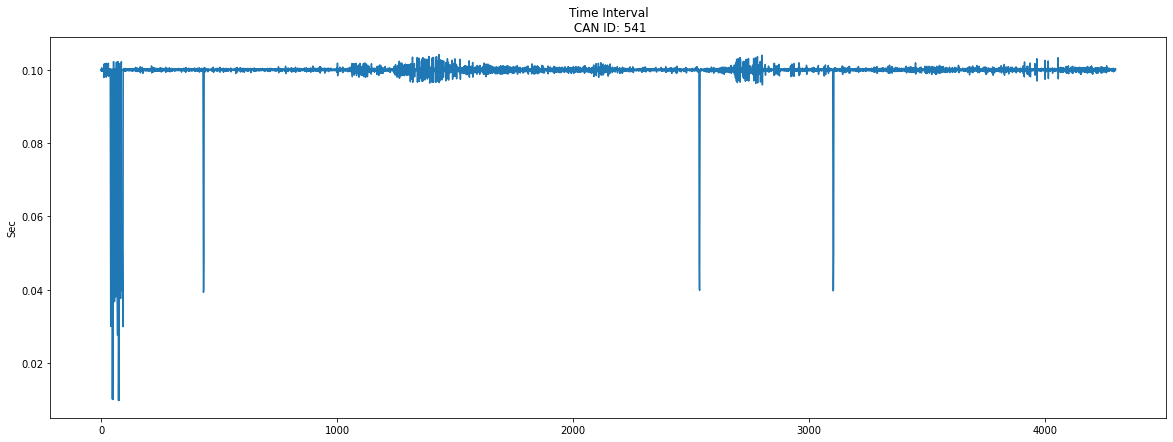

In [ ]:
CAN_ID = '541'
show_fig_time_interval(CAN_ID)

* Periodic / On-Event / Periodic-and-On-Event 분류 결과
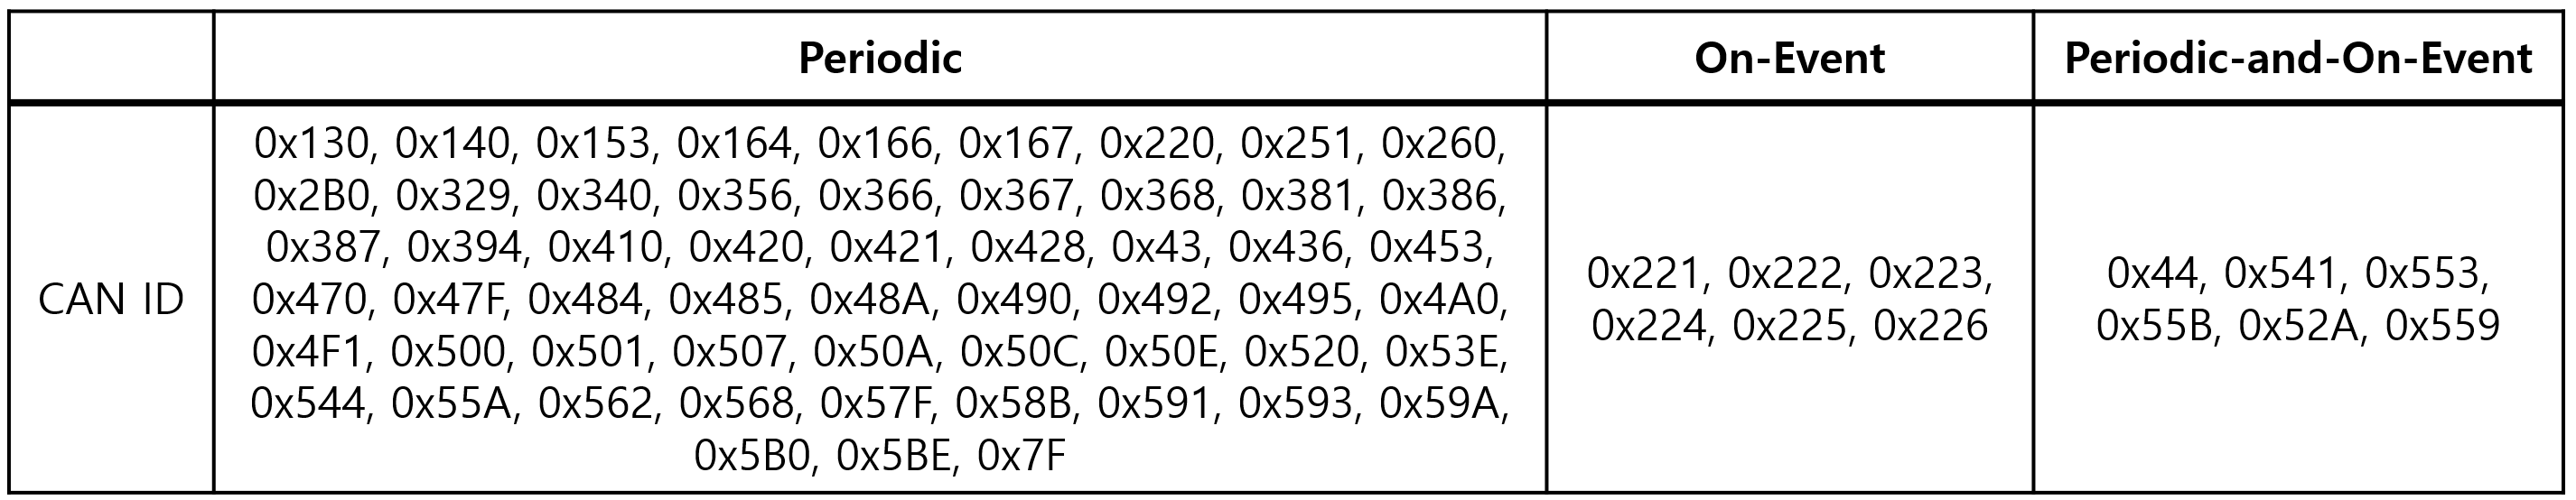

### Network Mapping

주어진 dataset에서 2개의 target ID를 설정하면, 해당ID를 갖는 메시지들간의 시간 간격을 return 해주는 함수

비주기 메시지의 경우에는 Network Mapping이 어려움


### Case #1

동일한 주기를 갖는 2개의 메시지가 같은 ECU에서 주기적으로 전송되는 **경우**



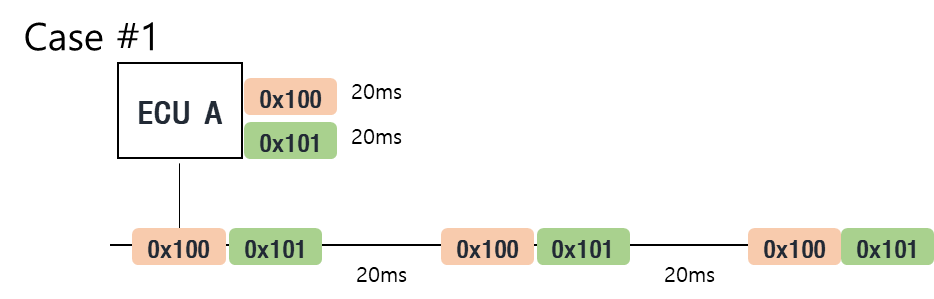


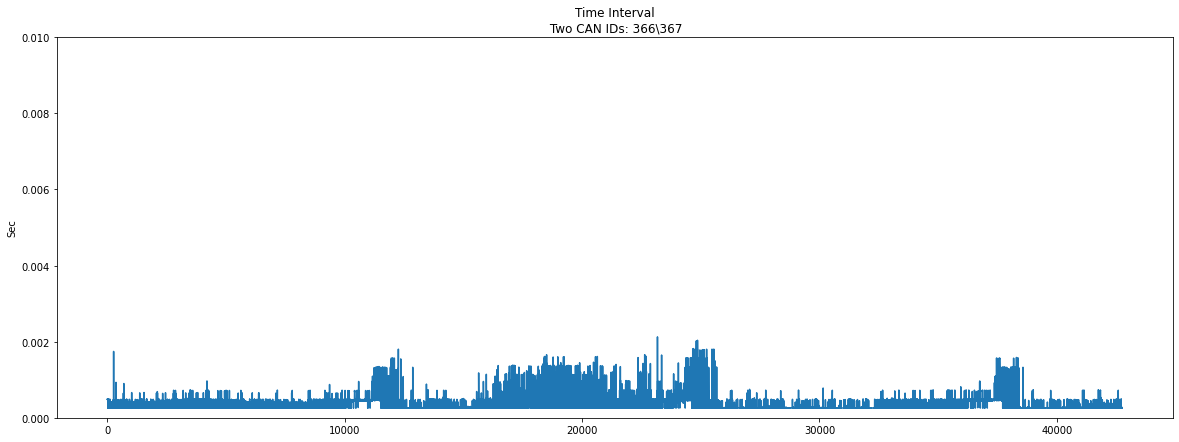

In [ ]:
import matplotlib.pyplot as plt

CAN_ID_A = "366"
CAN_ID_B = "367"

find_Row_A = df.loc[df['Arbitration_ID']==CAN_ID_A]
find_Row_B = df.loc[df['Arbitration_ID']==CAN_ID_B]

interval_list = []
for pair in zip(find_Row_A['Timestamp'], find_Row_B['Timestamp']):
  interval_list.append(pair[1] - pair[0] if pair[1] - pair[0]>0 else pair[0] - pair[1])

interval_list = interval_list[1:]
plt.plot(interval_list)
plt.ylabel("Sec")
plt.title('Time Interval\n Two CAN IDs: ' + CAN_ID_A + '\\' + CAN_ID_B)
plt.ylim([0,0.01])
plt.show()  

### Case #2

동일한 주기를 갖는 2개의 메시지가 같은 ECU에서 주기적으로 전송되는 경우

(2개의 메시지가 서로 다른 타이밍에 전송됨)

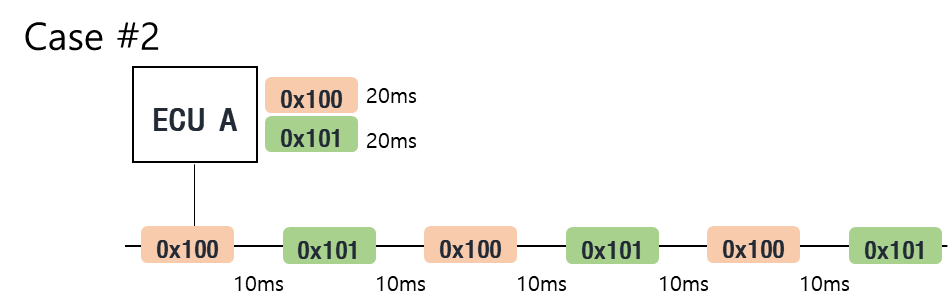

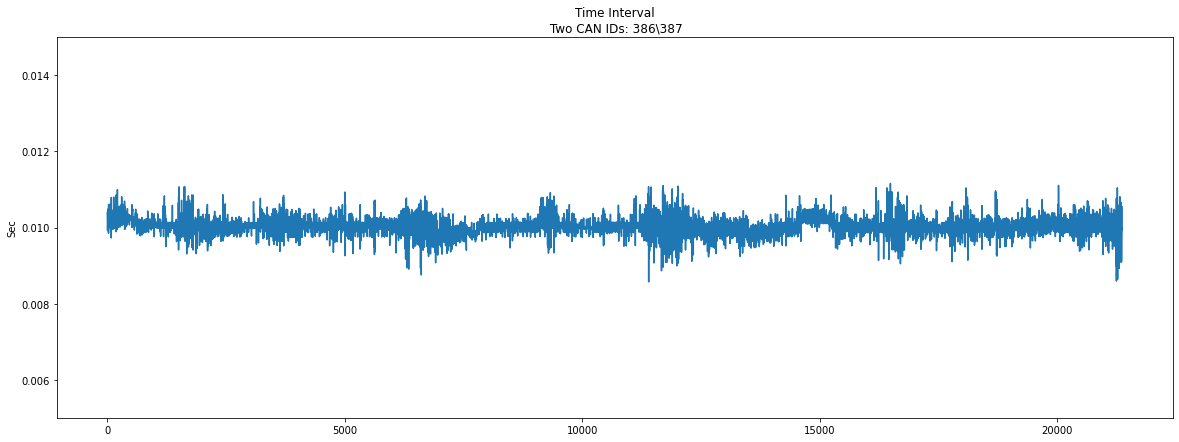

In [ ]:
import matplotlib.pyplot as plt

CAN_ID_A = "386"
CAN_ID_B = "387"

find_Row_A = df.loc[df['Arbitration_ID']==CAN_ID_A]
find_Row_B = df.loc[df['Arbitration_ID']==CAN_ID_B]

interval_list = []
for pair in zip(find_Row_A['Timestamp'], find_Row_B['Timestamp']):
  interval_list.append(pair[1] - pair[0] if pair[1] - pair[0]>0 else pair[0] - pair[1])

interval_list = interval_list[1:]
plt.plot(interval_list)
plt.ylabel("Sec")
plt.title('Time Interval\n Two CAN IDs: ' + CAN_ID_A + '\\' + CAN_ID_B)
plt.ylim([0.005,0.015])
plt.show()  

### Case #3

주기가 다른 2개의 메시지가 같은 ECU에서 주기적으로 전송되는 경우


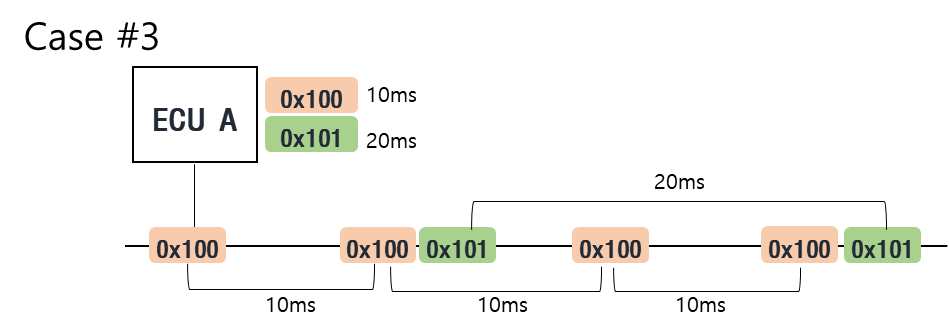

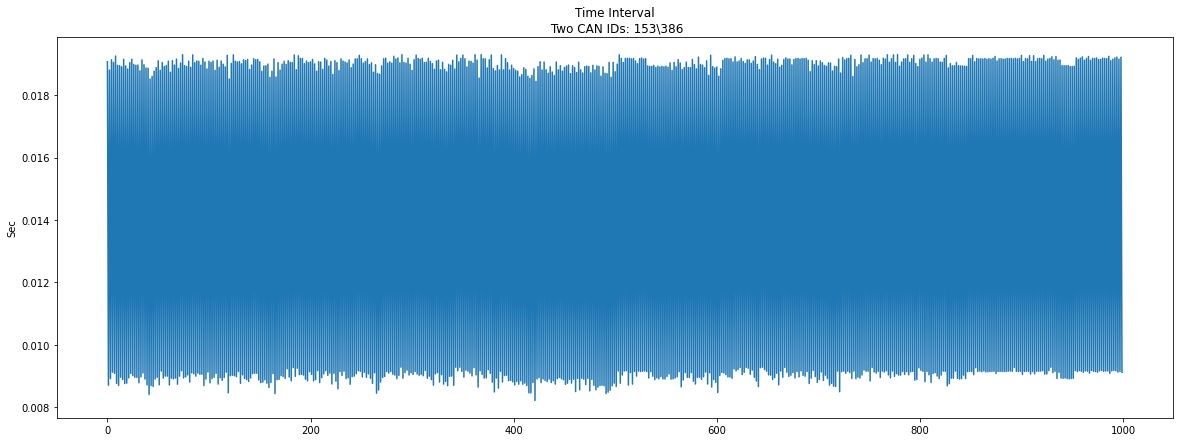

In [ ]:
CAN_ID_A = "153"
CAN_ID_B = "386"


find_Row_A = df.loc[df['Arbitration_ID']==CAN_ID_A]
find_Row_B = df.loc[df['Arbitration_ID']==CAN_ID_B]

interval_list = []
num = 0

if len(find_Row_A) > len(find_Row_B):
    
    for index, msg in find_Row_A.iterrows():
        time = msg['Timestamp']
        if len(find_Row_B.index[find_Row_B['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_B.loc[find_Row_B.index[find_Row_B['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval)
            num += 1
            if num > 1000:
                break

else:
    for index, msg in find_Row_B.iterrows():
        time = msg['Timestamp']
        if len(find_Row_A.index[find_Row_A['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_A.loc[find_Row_A.index[find_Row_A['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval)
            num += 1
            if num > 1000:
                break

interval_list = interval_list[1:]
plt.plot(interval_list)
plt.ylabel("Sec")
plt.title('Time Interval\n Two CAN IDs: ' + CAN_ID_A + '\\' + CAN_ID_B)
plt.show()  

Case #4

동일한 주기를 갖는 2개의 메시지가 서로 다른 ECU에서 주기적으로 전송되는 경우

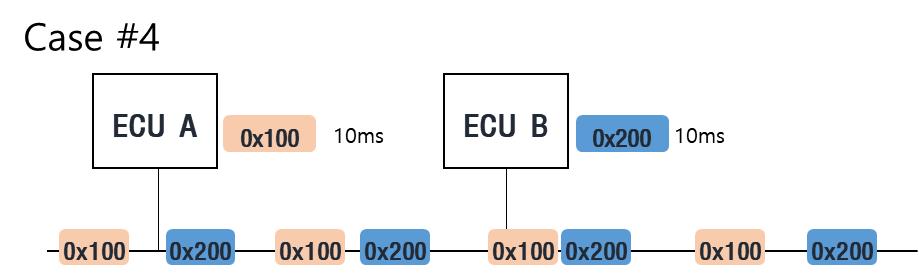

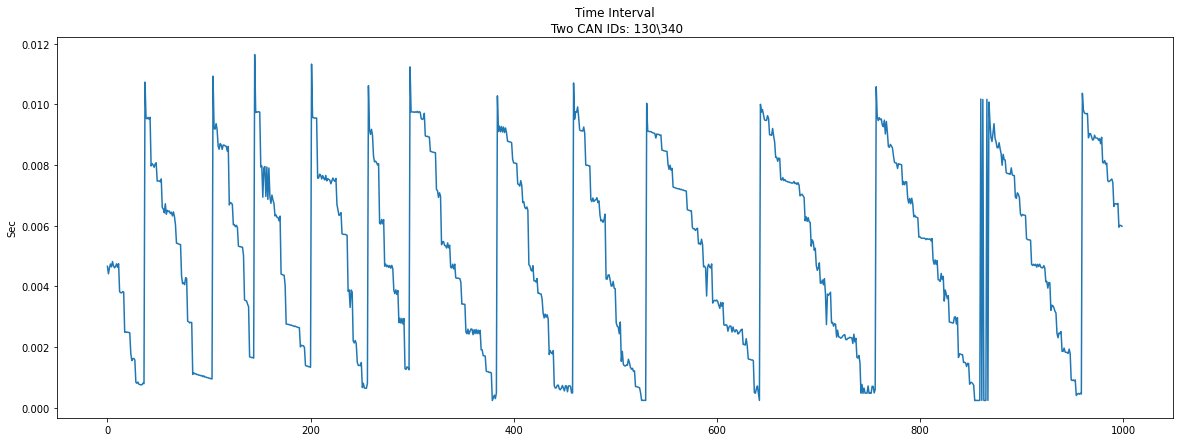

In [ ]:
CAN_ID_A = "130"
CAN_ID_B = "340"


find_Row_A = df.loc[df['Arbitration_ID']==CAN_ID_A]
find_Row_B = df.loc[df['Arbitration_ID']==CAN_ID_B]

interval_list = []
num = 0

if len(find_Row_A) > len(find_Row_B):
    
    for index, msg in find_Row_A.iterrows(): 
        time = msg['Timestamp']
        if len(find_Row_B.index[find_Row_B['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_B.loc[find_Row_B.index[find_Row_B['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval)
            num += 1
            if num > 1000:
                break

else:
    for index, msg in find_Row_B.iterrows(): 
        time = msg['Timestamp']
        if len(find_Row_A.index[find_Row_A['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_A.loc[find_Row_A.index[find_Row_A['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval)
            num += 1
            if num > 1000:
                break

interval_list = interval_list[1:]
plt.plot(interval_list)
plt.ylabel("Sec")
plt.title('Time Interval\n Two CAN IDs: ' + CAN_ID_A + '\\' + CAN_ID_B)
plt.show()  

Case #5

주기가 다른 2개의 메시지가 서로 다른 ECU에서 주기적으로 전송되는 경우

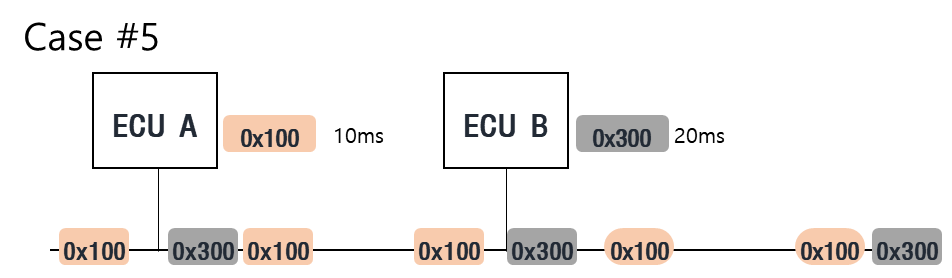

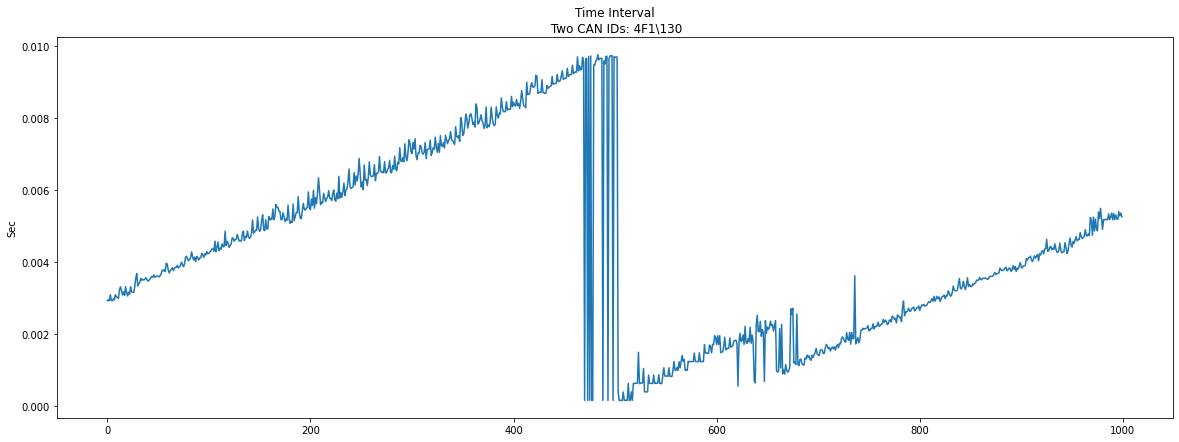

In [ ]:
CAN_ID_A = "4F1"
CAN_ID_B = "130"

find_Row_A = df.loc[df['Arbitration_ID']==CAN_ID_A]
find_Row_B = df.loc[df['Arbitration_ID']==CAN_ID_B]

interval_list = []
num = 0

if len(find_Row_A) > len(find_Row_B): 
    
    for index, msg in find_Row_B.iterrows(): 
        time = msg['Timestamp']
        if len(find_Row_A.index[find_Row_A['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_A.loc[find_Row_A.index[find_Row_A['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval)
            num += 1
            if num > 1000:
                break

else:
    for index, msg in find_Row_A.iterrows(): # 빠른 주기 메시지에 대한 시간 결과 확인
        time = msg['Timestamp']
        if len(find_Row_B.index[find_Row_B['Timestamp'] <= time]) != 0 :
            interval = time - find_Row_B.loc[find_Row_B.index[find_Row_B['Timestamp'] <= time][-1]]['Timestamp']
            interval_list.append(interval)
            num += 1
            if num > 1000:
                break

interval_list = interval_list[1:]
plt.plot(interval_list)
plt.ylabel("Sec")
plt.title('Time Interval\n Two CAN IDs: ' + CAN_ID_A + '\\' + CAN_ID_B)
plt.show()  

결과 테이블
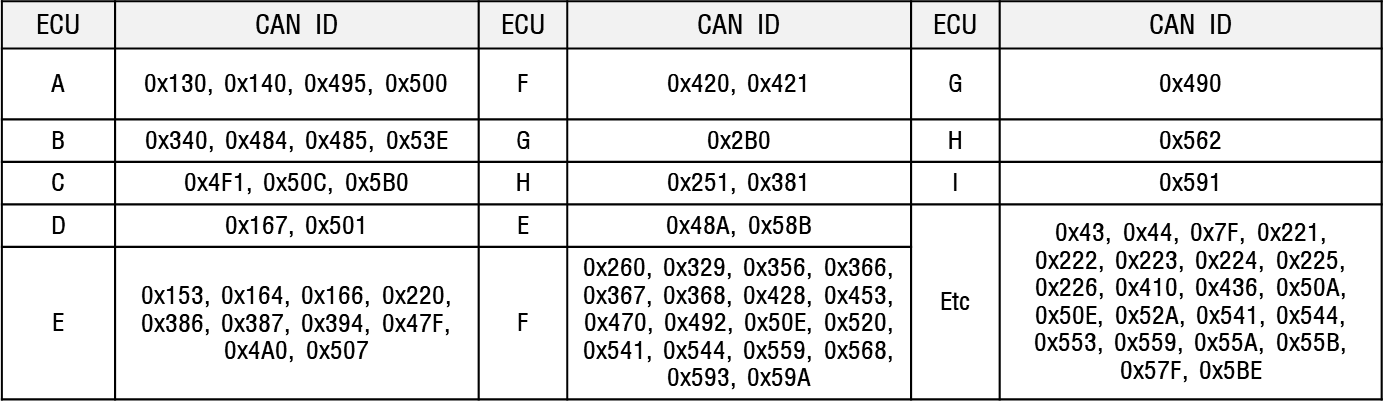


### Bit-flip Rate

Bit-flip Rates을 분석하는 경우에 Dataset의 사이즈가 커야함 

(30분정도 수집된 데이터셋 로드)

Small Dataset으로 Bit-flip Rates을 분석하는 경우, 차량의 모든 기능이 activation되지 않기 때문에 Bit Flip이 발생하지 않음

In [ ]:
!pip install gdown
!gdown --id 197EhIqL83N8WkWTFrkeLbc46LHZZJsXx --output Car_Dataset_Large.csv
# https://drive.google.com/file/d/197EhIqL83N8WkWTFrkeLbc46LHZZJsXx/view?usp=sharing

df = pd.read_csv('./Car_Dataset_Large.csv')
# Timestamp, Arbitration_ID, DLC, Data


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=197EhIqL83N8WkWTFrkeLbc46LHZZJsXx
To: /content/Car_Dataset_Large.csv
100% 209M/209M [00:01<00:00, 203MB/s]


In [ ]:
def get_bit_flip_rates(df):
  dlc = df['DLC'].values[0] # 첫번째 행에 있는 dlc 값을 사용
  previous_data_bin = bitarray(bin(0)[2:].zfill(dlc*8)) # 000000000~0000000 <--- 0으로 초기화되어 있는 dlc*8 길이의 비트시퀀스
  bitflip_num_list = [0]*(dlc*8)
  num_msgs = 0

  for index, msg in df.iterrows():
    if msg['Arbitration_ID'] == CAN_ID:
      # print(index, msg['Arbitration_ID'],msg['Data'])
      # msg['Data'].replace(" ","")
      # int(msg['Data'].replace(" ",""),16)
      # bin(int(msg['Data'].replace(" ",""),16))
      # bin(int(msg['Data'].replace(" ",""),16))[2:].zfill(msg['DLC']*8)
      current_data_bin = bitarray(bin(int(msg['Data'].replace(" ",""),16))[2:].zfill(msg['DLC']*8))
      bitflip = previous_data_bin ^ current_data_bin
      num_msgs += 1
      previous_data_bin = current_data_bin

      for index in range(dlc*8):
        bitflip_num_list[index] += bitflip[index]

  for index in range(dlc*8):
    bitflip_num_list[index] /= num_msgs
  # print(bitflip_num_list)
  return bitflip_num_list


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.2 MB/s 


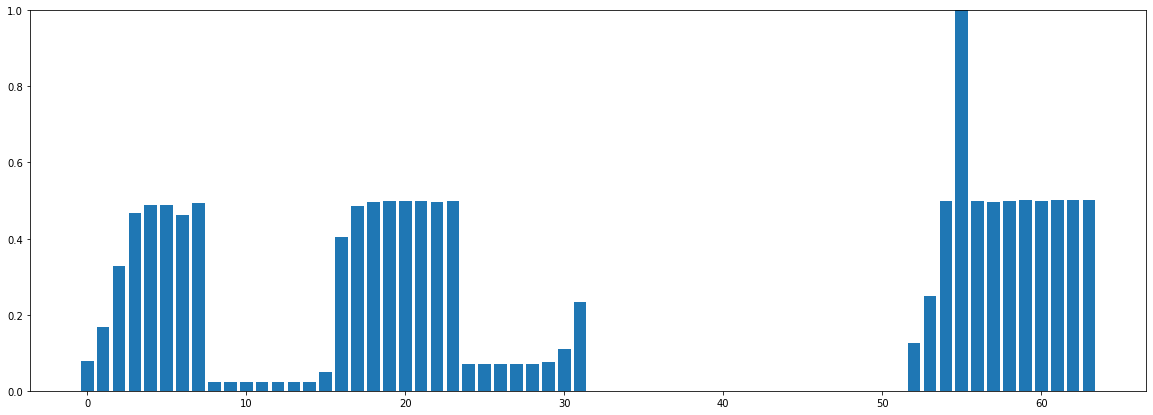

In [ ]:
!pip install bitarray
from bitarray import bitarray
import matplotlib.pyplot as plt

CAN_ID = '130'
dlc = 8
# print(df.loc[df['Arbitration_ID'] == CAN_ID])

bitflip_num_list = get_bit_flip_rates(df.loc[df['Arbitration_ID'] == CAN_ID])

plt.ylim([0,1])
plt.bar(range(dlc*8),bitflip_num_list)
plt.show()

### Bit Position Arrangement

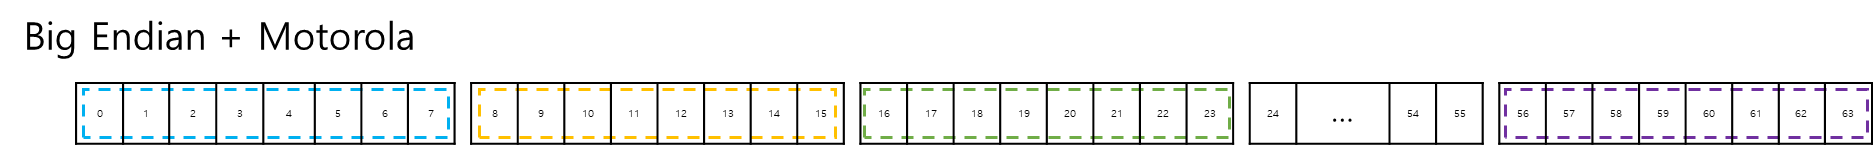

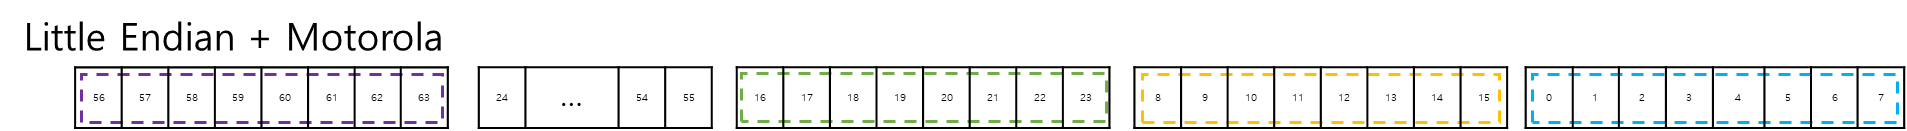

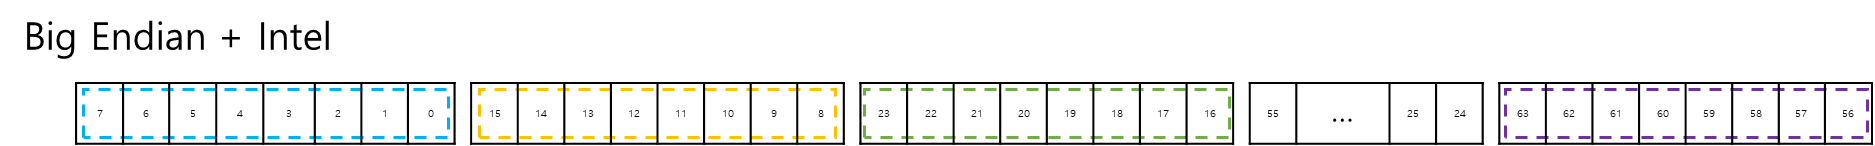

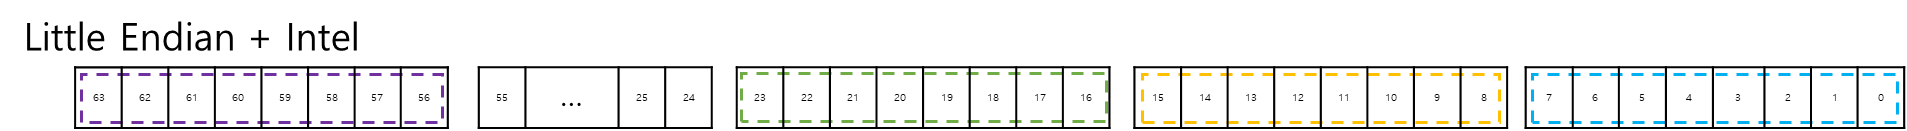

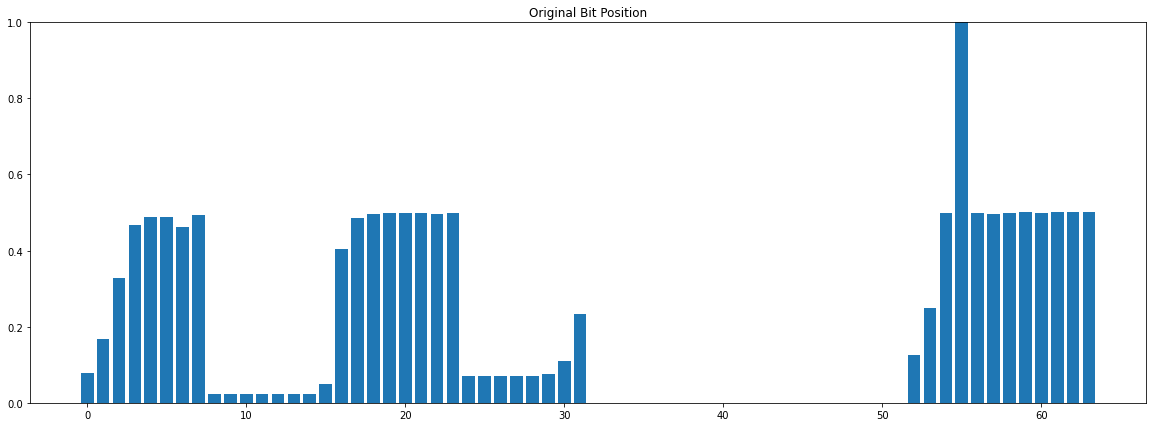

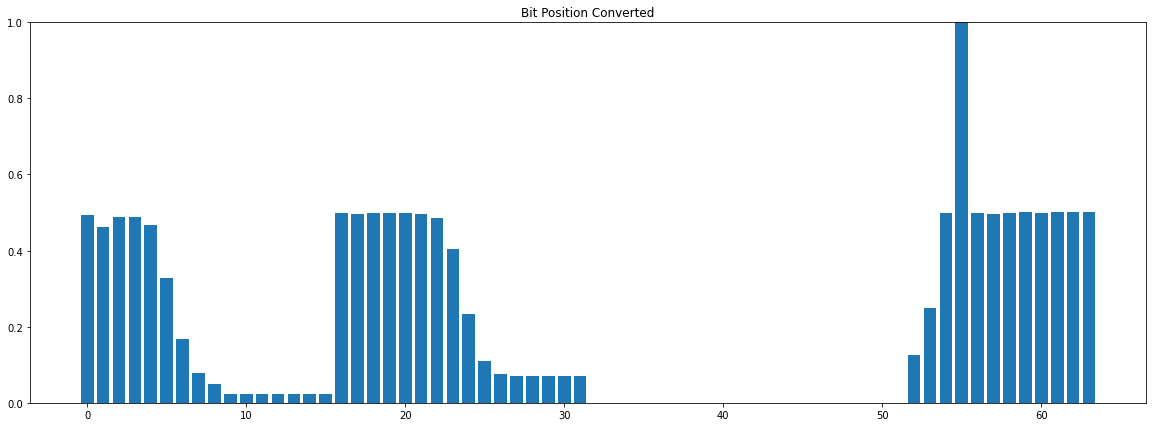

In [ ]:
plt.title('Original Bit Position')
plt.ylim([0,1])
plt.bar(range(dlc*8),bitflip_num_list)
plt.show()

for i in range(msg['DLC']):
  t = bitflip_num_list[8*i:8*(i+1)]
  bitflip_num_list[8*i:8*(i+1)] = t[::-1]

plt.title('Bit Position Converted')
plt.ylim([0,1])
plt.bar(range(dlc*8),bitflip_num_list)
plt.show()



### Bit-flip Rate Time Serise

## Draw a figure for a single bit

Bit-flip rate time serise

(3431, 64)


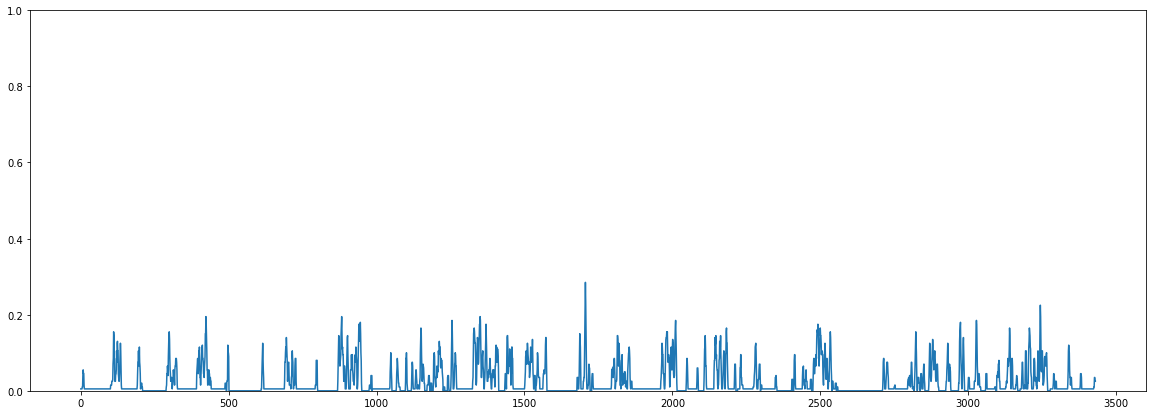

In [ ]:
import numpy as np

CAN_ID = '130'
dlc = 8
WINDOW_SIZE = 200
stride = 50
bit_flip_rate_time_serise = []

sub_df = df.loc[df['Arbitration_ID'] == CAN_ID]
for i in range(0, len(sub_df)-WINDOW_SIZE, stride ):
  # sub_df[i:i+WINDOW_SIZE]
  # print(i,i+WINDOW_SIZE, sub_df[i:i+WINDOW_SIZE])
  bitflip_num_list = get_bit_flip_rates( sub_df[i:i+WINDOW_SIZE] )
  bit_flip_rate_time_serise.append(bitflip_num_list)

bit_flip_rate_time_serise = np.array(bit_flip_rate_time_serise)
print(bit_flip_rate_time_serise.shape)

bit_position = 10
plt.plot(bit_flip_rate_time_serise[:,bit_position])
plt.ylim([0,1])
plt.show()


### For Multiple Bits

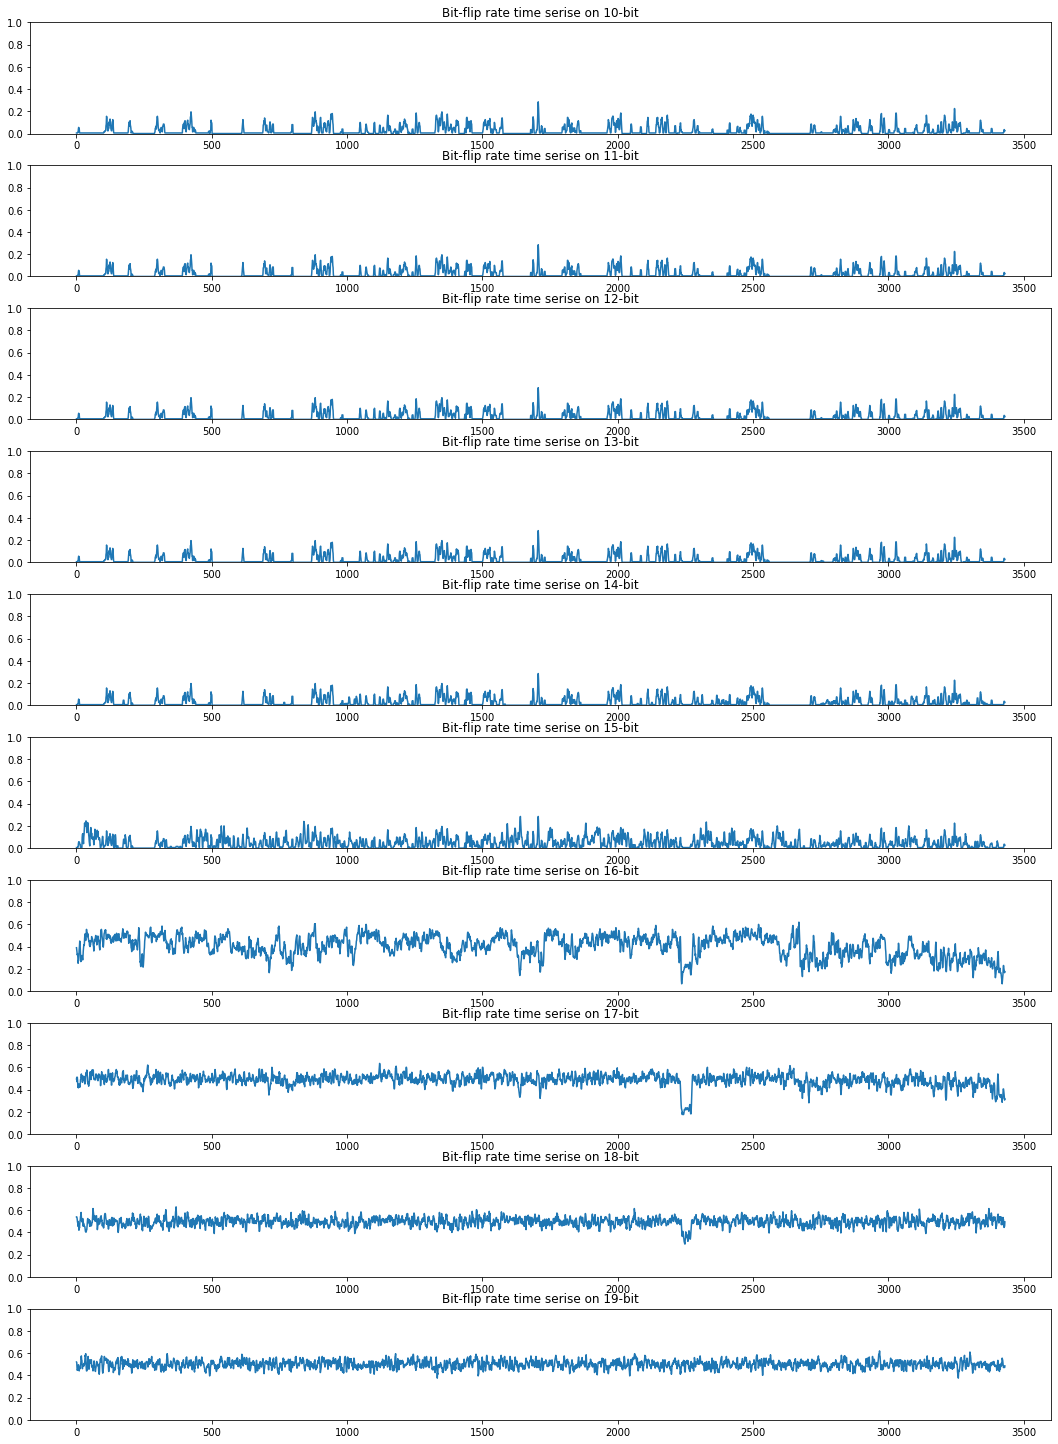

In [ ]:
plt.rcParams["figure.figsize"] = (15,20)

NUM_OF_FIGS = 10

fig, axs = plt.subplots(NUM_OF_FIGS)
fig.tight_layout()
for i in range(NUM_OF_FIGS):
  axs[i].plot(bit_flip_rate_time_serise[:,i+10])
  axs[i].set_ylim([0,1])
  axs[i].set_title('Bit-flip rate time serise on ' + str(i+10) +'-bit')

### Corr

[[ 1.          0.44776582  0.32851968 ...  0.04712717  0.00821454
  -0.01095599]
 [ 0.44776582  1.          0.71622516 ...  0.03880454  0.01883223
   0.01851426]
 [ 0.32851968  0.71622516  1.         ...  0.02155877 -0.0241925
   0.03485168]
 ...
 [ 0.04712717  0.03880454  0.02155877 ...  1.          0.04934125
   0.02197626]
 [ 0.00821454  0.01883223 -0.0241925  ...  0.04934125  1.
  -0.02570294]
 [-0.01095599  0.01851426  0.03485168 ...  0.02197626 -0.02570294
   1.        ]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


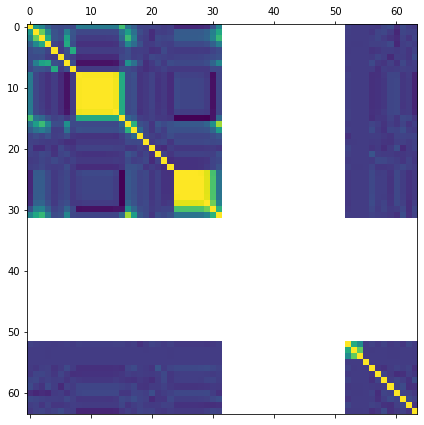

In [ ]:
# from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt

xcrr = np.corrcoef(np.transpose(bit_flip_rate_time_serise))
print(xcrr)
plt.rcParams["figure.figsize"] = (7,7)
plt.matshow(xcrr)
plt.show()


### Signal Type